[View in Colaboratory](https://colab.research.google.com/github/NikhilKorati/Predict-Loan-Interest-Rate/blob/master/Loan_Interest_Predictor.ipynb)

##Predict Loan Interest Rate for an insurance company using customer's historical information

### Import Libraries and get the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!wget https://www.dropbox.com/s/qmhmg9xfub03qhs/Personal%20Loans.xlsx

--2018-06-05 16:13:41--  https://www.dropbox.com/s/qmhmg9xfub03qhs/Personal%20Loans.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/h6wGyt7qNIIia3WEKrPFkcaRnjGpU4Bl0o4coC68VlZX9B5mH71zsB2kssm9Ukg5/file [following]
--2018-06-05 16:13:42--  https://dl.dropboxusercontent.com/content_link/h6wGyt7qNIIia3WEKrPFkcaRnjGpU4Bl0o4coC68VlZX9B5mH71zsB2kssm9Ukg5/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.9.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.9.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3624767 (3.5M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Personal Loans.xlsx’

Personal Loans.xlsx 100%[===========

In [3]:
!pip3 install xlrd

    100% |████████████████████████████████| 112kB 1.5MB/s 


In [0]:
loans_raw_df = pd.read_excel(io = 'Personal Loans.xlsx', sheet_name='Sheet1')

## Exploratory Analysis

In [5]:
loans_raw_df.head()

,ID,Amt Requested,Amt Funded,Length,Monthly Pmt,Pmts to Date,State,Income,Open LoC,Total LoC,...,Purpose,FICO,Home,Utilization,Rate,D/I,Standing,Balance,Delinquent,Months
0,1,3300,3300.0,36 months,111.29,1110.10,KY,1700.00,6,15,...,Renewable Energy,660-680,Mortgage,0.087,0.1306,0.0659,Currently paying,624,1,6.0
1,2,4800,4800.0,36 months,157.13,1095.99,CO,1650.00,3,12,...,Moving,716-750,Rent,0.000,0.1099,0.2370,Currently paying,0,0,NaN
2,3,8700,8700.0,36 months,272.15,5432.20,FL,5416.67,11,20,...,Consolidate Debt,716-750,Own,0.311,0.0788,0.1338,Currently paying,8568,0,NaN
3,4,12300,1325.0,36 months,417.25,13535.28,CA,2667.00,15,22,...,Consolidate Debt,681-715,Rent,0.291,0.1347,0.2208,Paid,10543,0,NaN
4,5,11200,11200.0,36 months,343.89,1030.65,NY,4333.33,13,26,...,Consolidate Debt,716-750,Rent,0.570,0.0662,0.1138,Currently paying,21379,0,NaN


In [6]:
loans_raw_df.tail()

,ID,Amt Requested,Amt Funded,Length,Monthly Pmt,Pmts to Date,State,Income,Open LoC,Total LoC,...,Purpose,FICO,Home,Utilization,Rate,D/I,Standing,Balance,Delinquent,Months
29046,29047,8875,8875.0,36 months,276.56,0.00,CO,5187.50,14,32,...,Consolidate Debt,716-750,Mortgage,0.639,0.0762,0.2674,No payment due,22370,0,NaN
29047,29048,20000,20000.0,60 months,465.27,2325.78,RI,5416.67,18,29,...,Credit Card,716-750,Own,0.613,0.1399,0.0746,Late,16738,1,19.0
29048,29049,20000,20000.0,60 months,531.11,22583.31,AL,5791.67,11,28,...,Consolidate Debt,660-680,Mortgage,0.670,0.2011,0.2119,Paid,12727,3,3.0
29049,29050,8000,8000.0,60 months,191.29,1709.28,LA,5000.00,14,39,...,Credit Card,681-715,Rent,0.644,0.1523,0.1996,Currently paying,44054,0,NaN
29050,29051,6000,6000.0,60 months,153.18,1673.10,CA,3750.00,8,8,...,Consolidate Debt,660-680,Rent,0.707,0.1825,0.0384,Currently paying,3183,0,NaN


In [7]:
print('No of observations: %d \nNo of features: %s' % (loans_raw_df.shape[0], loans_raw_df.shape[1]))

No of observations: 29051 
No of features: 21


In [8]:
loans_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 21 columns):
ID               29051 non-null int64
Amt Requested    29051 non-null int64
Amt Funded       29051 non-null float64
Length           29051 non-null object
Monthly Pmt      29051 non-null float64
Pmts to Date     29051 non-null float64
State            29051 non-null object
Income           29051 non-null float64
Open LoC         29051 non-null int64
Total LoC        29051 non-null int64
Employ           28211 non-null object
Purpose          29051 non-null object
FICO             29051 non-null object
Home             29051 non-null object
Utilization      29009 non-null float64
Rate             29051 non-null float64
D/I              29051 non-null float64
Standing         29051 non-null object
Balance          29051 non-null int64
Delinquent       29051 non-null int64
Months           10070 non-null float64
dtypes: float64(8), int64(6), object(7)
memory usage: 4.7+ MB


### Check for missing values

In [9]:
loans_raw_df.isnull().sum()

ID                   0
Amt Requested        0
Amt Funded           0
Length               0
Monthly Pmt          0
Pmts to Date         0
State                0
Income               0
Open LoC             0
Total LoC            0
Employ             840
Purpose              0
FICO                 0
Home                 0
Utilization         42
Rate                 0
D/I                  0
Standing             0
Balance              0
Delinquent           0
Months           18981
dtype: int64

### Drop ID as it is just an identifier

In [0]:
loans_raw_df.drop('ID', axis=1, inplace=True)

In [11]:
np.sort(loans_raw_df['State'].unique())

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'Ill', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'Tex', 'UT', 'VA', 'VT', 'WA', 'WI', 'WISC', 'WV', 'WY'],
      dtype=object)

### Clean the State feature

In [0]:
loans_raw_df.replace(to_replace='Ill', value='IL', inplace=True)
loans_raw_df.replace(to_replace='Tex', value='TX', inplace=True)
loans_raw_df.replace(to_replace='WISC', value='WI', inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


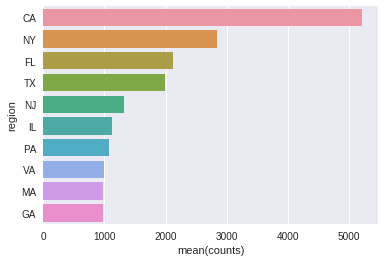

In [13]:
sns.barplot(y='region', x='counts', data=pd.DataFrame(loans_raw_df['State'].value_counts()[:10].rename_axis('region').reset_index(name='counts')))
plt.show()

In [0]:
northeast = ['CT', 'DC', 'DE', 'IA', 'IL', 'KS', 'KY', 'MA', 'ME', 'MI', 'MN', 'MS', 'MO', 'NH', 'NJ', 'NY', 'OH', 'PA', 'RI', 'VA', 'VT', 'WI', 'WV', 'IN']
northwest = ['AK', 'CO', 'MT', 'NE', 'OK', 'OR', 'SD', 'UT', 'WA', 'WY', 'ID']
southeast = ['AL', 'AR', 'FL', 'GA', 'HI', 'LA', 'MD', 'NC', 'NM', 'SC', 'TN']
southwest = ['AZ', 'CA', 'NV', 'TX']

loans_raw_df.replace(to_replace=northeast, value='north_east', inplace=True)
loans_raw_df.replace(to_replace=northwest, value='north_west', inplace=True)
loans_raw_df.replace(to_replace=southeast, value='south_east', inplace=True)
loans_raw_df.replace(to_replace=southwest, value='south_west', inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


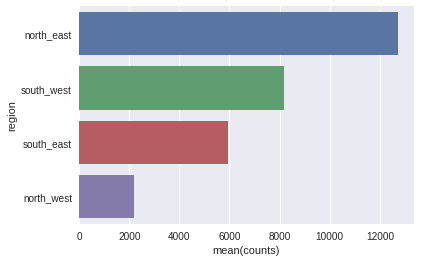

In [15]:
sns.barplot(y='region', x='counts', data=pd.DataFrame(loans_raw_df['State'].value_counts().rename_axis('region').reset_index(name='counts')))
plt.show()

### Data Prep other features

In [16]:
loans_raw_df['Length'].value_counts()

36 months    21523
60 months     7528
Name: Length, dtype: int64

In [0]:
loans_raw_df['Length'].replace(to_replace='36 months', value = '36', inplace = True)
loans_raw_df['Length'].replace(to_replace='60 months', value = '60', inplace = True)

In [18]:
loans_raw_df['Purpose'].value_counts()

Consolidate Debt            14040
Credit Card                  4038
Other                        2665
Home Improvement             2044
Major Appliance Purchase     1489
small_business               1360
Wedding                      1077
Car Loan                      658
Medical Expenses              471
Moving                        386
Vacation                      292
Household Expenses            260
Educational Expenses          200
Renewable Energy               71
Name: Purpose, dtype: int64

In [19]:
loans_raw_df['Home'].value_counts()

Rent        14059
Mortgage    12688
Own          2243
Any            60
None            1
Name: Home, dtype: int64

In [0]:
loans_raw_df['Home'].replace(to_replace='Any', value = 'Other', inplace = True)
loans_raw_df['Home'].replace(to_replace='None', value = 'Other', inplace = True)

In [21]:
loans_raw_df['Home'].value_counts()

Rent        14059
Mortgage    12688
Own          2243
Other          61
Name: Home, dtype: int64

In [22]:
loans_raw_df['Employ'].value_counts()

10+    6665
< 1    3242
2      3178
3      2830
4      2552
5      2417
1      2328
6      1672
7      1302
8      1093
9       932
Name: Employ, dtype: int64

In [23]:
loans_raw_df['Employ'].head()

0      6
1    NaN
2      3
3      3
4    NaN
Name: Employ, dtype: object

In [0]:
loans_raw_df['Employ'] = loans_raw_df['Employ'].apply(str)

In [0]:
loans_raw_df['Employ'].replace(to_replace='< 1', value = 'Less than 2', inplace = True)
loans_raw_df['Employ'].replace(to_replace='1', value = 'Less than 2', inplace = True)
loans_raw_df['Employ'].replace(to_replace='2', value = 'Less than 2', inplace = True)
loans_raw_df['Employ'].replace(to_replace='3', value = 'Less than 4', inplace = True)
loans_raw_df['Employ'].replace(to_replace='4', value = 'Less than 4', inplace = True)
loans_raw_df['Employ'].replace(to_replace='5', value = 'Less than 6', inplace = True)
loans_raw_df['Employ'].replace(to_replace='6', value = 'Less than 6', inplace = True)
loans_raw_df['Employ'].replace(to_replace='7', value = 'Less than 9', inplace = True)
loans_raw_df['Employ'].replace(to_replace='8', value = 'Less than 9', inplace = True)
loans_raw_df['Employ'].replace(to_replace='9', value = 'Less than 9', inplace = True)
loans_raw_df['Employ'].replace(to_replace='10+', value = 'More than 10', inplace = True)
loans_raw_df['Employ'].replace(to_replace='nan', value = 'Other', inplace = True)

In [26]:
loans_raw_df['Employ'].value_counts()

Less than 2     8748
More than 10    6665
Less than 4     5382
Less than 6     4089
Less than 9     3327
Other            840
Name: Employ, dtype: int64

In [27]:
loans_raw_df['FICO'].value_counts()

681-715    10315
716-750     8676
660-680     4557
751-780     3901
781+        1602
Name: FICO, dtype: int64

In [28]:
loans_raw_df['Standing'].value_counts()

Currently paying                      21136
Paid                                   4239
No payment due                         2191
Extremely late/charged off/default     1329
Late                                    156
Name: Standing, dtype: int64

In [0]:
loans_raw_df['Standing'].replace(to_replace = 'Currently paying', value = 'current', inplace = True)
loans_raw_df['Standing'].replace(to_replace = 'Paid', value = 'paid', inplace = True)
loans_raw_df['Standing'].replace(to_replace = 'No payment due', value = 'no_due', inplace = True)
loans_raw_df['Standing'].replace(to_replace = 'Extremely late/charged off/default', value = 'default', inplace = True)
loans_raw_df['Standing'].replace(to_replace = 'Late', value = 'late', inplace = True)

In [30]:
loans_raw_df['Standing'].value_counts()

current    21136
paid        4239
no_due      2191
default     1329
late         156
Name: Standing, dtype: int64

In [31]:
np.mean(loans_raw_df['Months']) 

36.189374379344585

In [32]:
loans_raw_df['Months'].head()

0    6.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: Months, dtype: float64

In [0]:
loans_raw_df['Months'].fillna(np.mean(loans_raw_df['Months']), inplace = True)

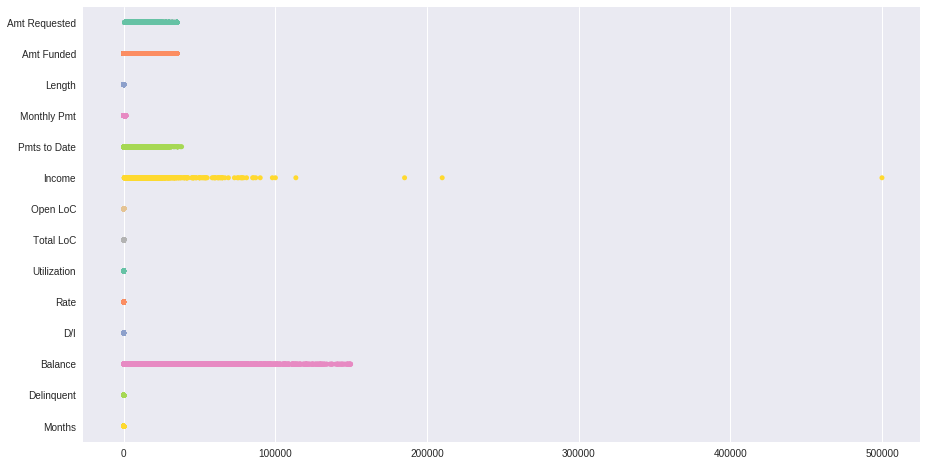

In [34]:
plt.figure(figsize=(15,8))
sns.stripplot(data=loans_raw_df, orient="h", palette="Set2")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


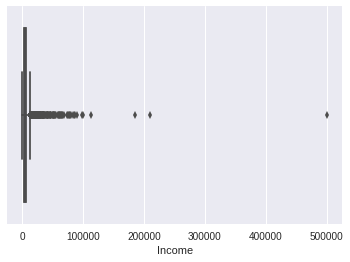

In [35]:
sns.boxplot(x=loans_raw_df['Income'])

### Remove possible outliers from Income feature

In [0]:
loans_raw_df = loans_raw_df.loc[loans_raw_df['Income'] <=120000]

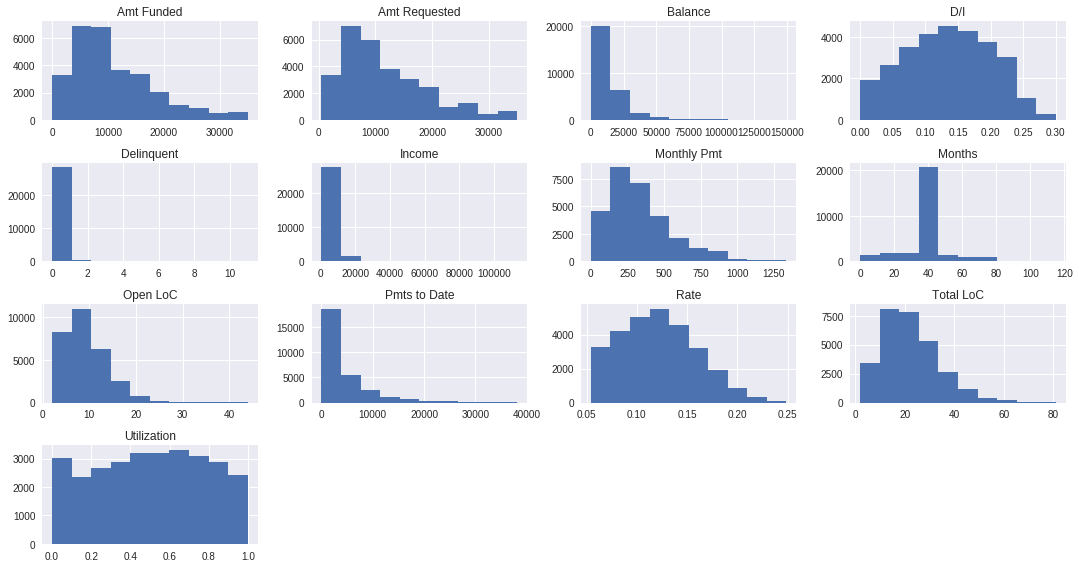

In [37]:
loans_raw_df.hist(figsize= (15,8))
plt.tight_layout()
plt.show()

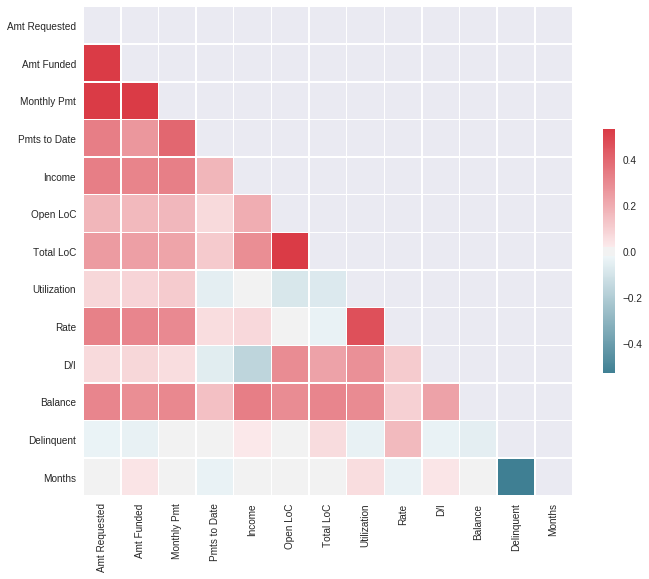

In [38]:
d_corr = loans_raw_df.corr()

mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(d_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Remove correlated features

In [39]:
loans_raw_df[['Amt Requested', 'Amt Funded', 'Monthly Pmt', 'Total LoC', 'Open LoC', 'Months', 'Delinquent']].corr()


,Amt Requested,Amt Funded,Monthly Pmt,Total LoC,Open LoC,Months,Delinquent
Amt Requested,1.000000,0.944577,0.923340,0.252645,0.174493,0.018533,-0.031038
Amt Funded,0.944577,1.000000,0.905854,0.238910,0.163680,0.038447,-0.039251
Monthly Pmt,0.923340,0.905854,1.000000,0.226597,0.169745,0.009972,-0.019031
Total LoC,0.252645,0.238910,0.226597,1.000000,0.682591,0.004638,0.064402
Open LoC,0.174493,0.163680,0.169745,0.682591,1.000000,0.016378,0.005857
Months,0.018533,0.038447,0.009972,0.004638,0.016378,1.000000,-0.532176
Delinquent,-0.031038,-0.039251,-0.019031,0.064402,0.005857,-0.532176,1.000000


Amt Requested - Amt Funded <br>
Amt Requested - Monthly Pmt <br>
Amt Funded - Monthly Pmt <br>
Open LoC - Total LoC <br>


### Transform Numerical features 

In [0]:
loans_raw_df['Amt Requested'] = np.sqrt(loans_raw_df['Amt Requested'])
loans_raw_df['Balance'] = np.sqrt(np.sqrt(loans_raw_df['Balance']))
loans_raw_df['Open LoC'] = np.sqrt(np.sqrt(loans_raw_df['Open LoC']))
loans_raw_df['Pmts to Date'] = np.sqrt(np.sqrt(loans_raw_df['Pmts to Date']))

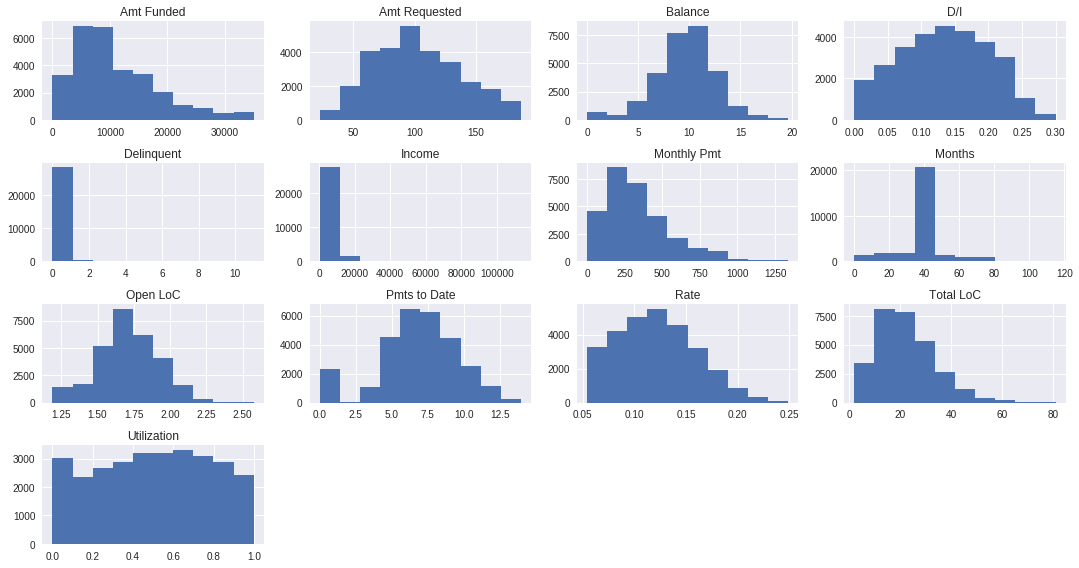

In [41]:
loans_raw_df.hist(figsize= (15,8))
plt.tight_layout()
plt.show()

In [0]:
loans_raw_df['Income'] = np.log(loans_raw_df['Income'])

In [0]:
loans_raw_df['Utilization'].fillna(np.mean(loans_raw_df['Utilization']), inplace = True)

In [44]:
loans_raw_df.isnull().sum()

Amt Requested    0
Amt Funded       0
Length           0
Monthly Pmt      0
Pmts to Date     0
State            0
Income           0
Open LoC         0
Total LoC        0
Employ           0
Purpose          0
FICO             0
Home             0
Utilization      0
Rate             0
D/I              0
Standing         0
Balance          0
Delinquent       0
Months           0
dtype: int64

In [0]:
loans_process_df = loans_raw_df

In [46]:
loans_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29048 entries, 0 to 29050
Data columns (total 20 columns):
Amt Requested    29048 non-null float64
Amt Funded       29048 non-null float64
Length           29048 non-null object
Monthly Pmt      29048 non-null float64
Pmts to Date     29048 non-null float64
State            29048 non-null object
Income           29048 non-null float64
Open LoC         29048 non-null float64
Total LoC        29048 non-null int64
Employ           29048 non-null object
Purpose          29048 non-null object
FICO             29048 non-null object
Home             29048 non-null object
Utilization      29048 non-null float64
Rate             29048 non-null float64
D/I              29048 non-null float64
Standing         29048 non-null object
Balance          29048 non-null float64
Delinquent       29048 non-null int64
Months           29048 non-null float64
dtypes: float64(11), int64(2), object(7)
memory usage: 4.7+ MB


### Create dummy variables for Categorical features

In [0]:
dummy_columns = ['Length', 'State', 'Employ', 'Purpose', 'FICO', 'Home', 'Standing']

data_new = loans_process_df

for cat in dummy_columns:
    dummy_cols = pd.get_dummies(loans_process_df[cat], prefix=cat, drop_first=True)
    data_new = data_new.join(dummy_cols)

In [48]:
data_vars = data_new.columns.values.tolist()
to_keep = [i for i in data_vars if i not in dummy_columns]
to_keep

['Amt Requested',
 'Amt Funded',
 'Monthly Pmt',
 'Pmts to Date',
 'Income',
 'Open LoC',
 'Total LoC',
 'Utilization',
 'Rate',
 'D/I',
 'Balance',
 'Delinquent',
 'Months',
 'Length_60',
 'State_north_west',
 'State_south_east',
 'State_south_west',
 'Employ_Less than 4',
 'Employ_Less than 6',
 'Employ_Less than 9',
 'Employ_More than 10',
 'Employ_Other',
 'Purpose_Consolidate Debt',
 'Purpose_Credit Card',
 'Purpose_Educational Expenses',
 'Purpose_Home Improvement',
 'Purpose_Household Expenses',
 'Purpose_Major Appliance Purchase',
 'Purpose_Medical Expenses',
 'Purpose_Moving',
 'Purpose_Other',
 'Purpose_Renewable Energy',
 'Purpose_Vacation',
 'Purpose_Wedding',
 'Purpose_small_business',
 'FICO_681-715',
 'FICO_716-750',
 'FICO_751-780',
 'FICO_781+',
 'Home_Other',
 'Home_Own',
 'Home_Rent',
 'Standing_default',
 'Standing_late',
 'Standing_no_due',
 'Standing_paid']

In [49]:
final_loans_df = data_new[to_keep]
final_loans_df.head()

,Amt Requested,Amt Funded,Monthly Pmt,Pmts to Date,Income,Open LoC,Total LoC,Utilization,Rate,D/I,...,FICO_716-750,FICO_751-780,FICO_781+,Home_Other,Home_Own,Home_Rent,Standing_default,Standing_late,Standing_no_due,Standing_paid
0,57.445626,3300.0,111.29,5.772189,7.438384,1.565085,15,0.087,0.1306,0.0659,...,0,0,0,0,0,0,0,0,0,0
1,69.282032,4800.0,157.13,5.753759,7.408531,1.316074,12,0.000,0.1099,0.2370,...,1,0,0,0,0,1,0,0,0,0
2,93.273791,8700.0,272.15,8.585072,8.597237,1.821160,20,0.311,0.0788,0.1338,...,1,0,0,0,1,0,0,0,0,0
3,110.905365,1325.0,417.25,10.786159,7.888710,1.967990,22,0.291,0.1347,0.2208,...,0,0,0,0,0,1,0,0,0,1
4,105.830052,11200.0,343.89,5.666016,8.374092,1.898829,26,0.570,0.0662,0.1138,...,1,0,0,0,0,1,0,0,0,0


In [0]:
y = ['Rate']
exclude_list = ['Rate','Amt Funded', 'Monthly Pmt', 'Total LoC']
X = [i for i in final_loans_df.columns.values.tolist() if i not in exclude_list]

## Model Building

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_loans_df[X], final_loans_df[y], test_size=0.3, random_state=0)

### Try decision tree regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)} 
clf_tree=DecisionTreeRegressor() 
clf=GridSearchCV(clf_tree,parameters) 
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 13, 'min_samples_split': 70}

In [54]:
from sklearn.model_selection import cross_val_score

dtreeR = DecisionTreeRegressor(max_depth=13, min_samples_split=70)
dtreeR.fit(X_train, y_train)
y_pred = dtreeR.predict(X_test)
print('Score of decision tree regressor on test set: {:.2f}'.format(dtreeR.score(X_test, y_test)))

Score of decision tree regressor on test set: 0.82


### Extract important features from dtree regressor

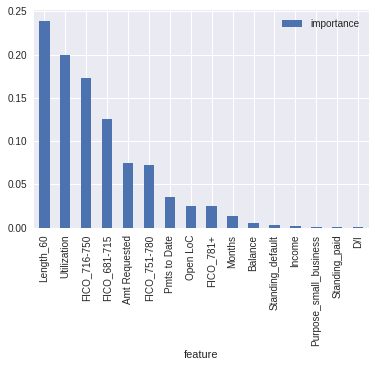

In [55]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtreeR.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances[importances.values > 0.00001]

importances.plot.bar()

### Feature scale the features to fit it to a neural network

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Import Keras

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [58]:
X_train.shape

(20333, 42)

### Build the neural network model

1) Adam optimizer <br>
2) Mean Squared Loss <br>
3) Relu Activation <br>
4) 100 epochs <br>
5) Normal Kernel Initializer

In [61]:
regressor = Sequential()
regressor.add(Dense(6, activation = 'relu', input_dim = 42, kernel_initializer = 'normal'))
regressor.add(Dense(6, activation = 'relu', kernel_initializer = 'normal'))
regressor.add(Dense(1, activation = 'relu', kernel_initializer = 'normal'))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size= 100, epochs=100)

y_pred = regressor.predict(X_test)

Epoch 1/100
20333/20333 [==============================] - 1s 59us/step - loss: 0.0029
Epoch 2/100
20333/20333 [==============================] - 1s 55us/step - loss: 3.5154e-04
Epoch 3/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.9140e-04
Epoch 4/100
20333/20333 [==============================] - 1s 61us/step - loss: 2.7308e-04
Epoch 5/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.6484e-04
Epoch 6/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.6010e-04
Epoch 7/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.5684e-04
Epoch 8/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.5512e-04
Epoch 9/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.5363e-04
Epoch 10/100
 1100/20333 [>.............................] - ETA: 1s - loss: 2.6357e-04

20333/20333 [==============================] - 1s 59us/step - loss: 2.5155e-04
Epoch 11/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.5104e-04
Epoch 12/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.5111e-04
Epoch 13/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4878e-04
Epoch 14/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.4826e-04
Epoch 15/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4794e-04
Epoch 16/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4692e-04
Epoch 17/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4635e-04
Epoch 18/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4620e-04
Epoch 19/100
 3800/20333 [====>.........................] - ETA: 0s - loss: 2.5545e-04

20333/20333 [==============================] - 1s 59us/step - loss: 2.4562e-04
Epoch 20/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4440e-04
Epoch 21/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4480e-04
Epoch 22/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4480e-04
Epoch 23/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.4578e-04
Epoch 24/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4391e-04
Epoch 25/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4422e-04
Epoch 26/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.4284e-04
Epoch 27/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4415e-04
Epoch 28/100
 3700/20333 [====>.........................] - ETA: 0s - loss: 2.4386e-04

20333/20333 [==============================] - 1s 58us/step - loss: 2.4272e-04
Epoch 29/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4222e-04
Epoch 30/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4122e-04
Epoch 31/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4191e-04
Epoch 32/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4154e-04
Epoch 33/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4188e-04
Epoch 34/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4126e-04
Epoch 35/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4091e-04
Epoch 36/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4056e-04
Epoch 37/100
 4900/20333 [======>.......................] - ETA: 0s - loss: 2.4389e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.4104e-04
Epoch 38/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4040e-04
Epoch 39/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.4115e-04
Epoch 40/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3969e-04
Epoch 41/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3968e-04
Epoch 42/100
20333/20333 [==============================] - 1s 60us/step - loss: 2.3995e-04
Epoch 43/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3922e-04
Epoch 44/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.4010e-04
Epoch 45/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.4036e-04
Epoch 46/100
 4500/20333 [=====>........................] - ETA: 0s - loss: 2.3561e-04

20333/20333 [==============================] - 1s 59us/step - loss: 2.3925e-04
Epoch 47/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3916e-04
Epoch 48/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.4045e-04
Epoch 49/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3914e-04
Epoch 50/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3957e-04
Epoch 51/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3920e-04
Epoch 52/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.4022e-04
Epoch 53/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3769e-04
Epoch 54/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3757e-04
Epoch 55/100
 4800/20333 [======>.......................] - ETA: 0s - loss: 2.2505e-04

20333/20333 [==============================] - 1s 59us/step - loss: 2.3821e-04
Epoch 56/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3708e-04
Epoch 57/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3764e-04
Epoch 58/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3804e-04
Epoch 59/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3791e-04
Epoch 60/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3852e-04
Epoch 61/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3788e-04
Epoch 62/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3642e-04
Epoch 63/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3770e-04
Epoch 64/100
 5800/20333 [=======>......................] - ETA: 0s - loss: 2.4299e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.3727e-04
Epoch 65/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3655e-04
Epoch 66/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3718e-04
Epoch 67/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3679e-04
Epoch 68/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3637e-04
Epoch 69/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3675e-04
Epoch 70/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3646e-04
Epoch 71/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3641e-04
Epoch 72/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3683e-04
Epoch 73/100
 2900/20333 [===>..........................] - ETA: 0s - loss: 2.4460e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.3622e-04
Epoch 74/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3533e-04
Epoch 75/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3535e-04
Epoch 76/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3605e-04
Epoch 77/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3544e-04
Epoch 78/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3595e-04
Epoch 79/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3516e-04
Epoch 80/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3603e-04
Epoch 81/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3572e-04
Epoch 82/100
 3900/20333 [====>.........................] - ETA: 0s - loss: 2.2597e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.3453e-04
Epoch 83/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3591e-04
Epoch 84/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3535e-04
Epoch 85/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3559e-04
Epoch 86/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3429e-04
Epoch 87/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3512e-04
Epoch 88/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3472e-04
Epoch 89/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3461e-04
Epoch 90/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3417e-04
Epoch 91/100
 4800/20333 [======>.......................] - ETA: 0s - loss: 2.3903e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.3457e-04
Epoch 92/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3461e-04
Epoch 93/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3400e-04
Epoch 94/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3596e-04
Epoch 95/100
20333/20333 [==============================] - 1s 58us/step - loss: 2.3403e-04
Epoch 96/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3436e-04
Epoch 97/100
20333/20333 [==============================] - 1s 57us/step - loss: 2.3500e-04
Epoch 98/100
20333/20333 [==============================] - 1s 59us/step - loss: 2.3463e-04
Epoch 99/100
20333/20333 [==============================] - 1s 56us/step - loss: 2.3441e-04
Epoch 100/100
 5800/20333 [=======>......................] - ETA: 0s - loss: 2.3363e-04

20333/20333 [==============================] - 1s 57us/step - loss: 2.3439e-04


### Model Evaluation

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8337000493601427

## Future Improvements

1) Tune the neural network to see if there is any imporvement in performance <br>
2) Get More Data and  fit it to the neural model <br>
3) Try fitting the neural model with only important features <br>
4) Remove Categorical features and fit the neural network with only numerical features <br>
5) Perform Dimensionality reduction on a higher dimension <br>